Your goal is to predict the binary class <b>heart_disease_present</b>, which represents whether or not a patient has heart disease:

 - 0 represents no heart disease present
 - 1 represents heart disease present

Performance is evaluated according to <b>binary log loss.</b>

In [1]:
# Put these at the top of every notebook, to get automatic reloading and inline plotting
import pandas as pd
from IPython.core.display import display, HTML

%reload_ext autoreload
%autoreload 2
%matplotlib inline

pd.set_option('display.max_rows', 800)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.set_option('display.max_colwidth', 100)

display(HTML("<style>.container { width:100% !important; }</style>"))

import warnings
warnings.filterwarnings('ignore')

import os, glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='darkgrid')

from Utils.DataUtils import *
from Utils.UtilsViz import *

import warnings
warnings.filterwarnings('ignore')

In [38]:
train_features = pd.read_csv("./data/train_values.csv")
train_labels = pd.read_csv("./data/train_labels.csv")
test_features = pd.read_csv("./data/test_values.csv")

In [39]:
data = pd.merge(train_features, train_labels, how='inner')

In [46]:
display(
    data.head(),
    data.shape)

slope_of_peak_exercise_st_segment               thal  resting_blood_pressure chest_pain_type  num_major_vessels  fasting_blood_sugar_gt_120_mg_per_dl resting_ekg_results  serum_cholesterol_mg_per_dl  oldpeak_eq_st_depression sex  age  max_heart_rate_achieved exercise_induced_angina  heart_disease_present
0                                 1             normal                     128               2                  0                                     0                   2                          308                       0.0   1   45                      170                       0                      0
1                                 2             normal                     110               3                  0                                     0                   0                          214                       1.6   0   54                      158                       0                      0
2                                 1             normal                     125               4                  3                                     0                   2                          304                       0.0   1   77                      162                       1                      1
3                                 1  reversible_defect                     152               4                  0                                     0                   0                          223                       0.0   1   40                      181                       0                      1
4                                 3  reversible_defect                     178               1                  0                                     0                   2                          270                       4.2   1   59                      145                       0                      0

(180, 14)

In [47]:
analyse_nans(data)

slope_of_peak_exercise_st_segment thal resting_blood_pressure chest_pain_type num_major_vessels fasting_blood_sugar_gt_120_mg_per_dl resting_ekg_results serum_cholesterol_mg_per_dl oldpeak_eq_st_depression sex age max_heart_rate_achieved exercise_induced_angina heart_disease_present
total                                      0    0                      0               0                 0                                    0                   0                           0                        0   0   0                       0                       0                     0
percentage                                 0    0                      0               0                 0                                    0                   0                           0                        0   0   0                       0                       0                     0
idx_list                                  []   []                     []              []                []                                   []                  []                          []                       []  []  []                      []                      []                    []

In [48]:
# Drop irrelevant columns 
drop_cols = ["patient_id"]

for c in drop_cols:
    if c in data.columns:
        data.drop(labels=c, inplace=True, axis=1)

In [50]:
y_var = ["heart_disease_present"]

cat_vars = ["slope_of_peak_exercise_st_segment", "thal", "chest_pain_type", "resting_ekg_results", "sex", "exercise_induced_angina"]

cont_vars = [c for c in data.columns if c not in cat_vars + y_var]

for cv in cat_vars:
    data[cv] = data[cv].astype("category")


display(data[cat_vars].head())
display(data[cont_vars].head())

slope_of_peak_exercise_st_segment               thal chest_pain_type resting_ekg_results sex exercise_induced_angina
0                                 1             normal               2                   2   1                       0
1                                 2             normal               3                   0   0                       0
2                                 1             normal               4                   2   1                       1
3                                 1  reversible_defect               4                   0   1                       0
4                                 3  reversible_defect               1                   2   1                       0

resting_blood_pressure  num_major_vessels  fasting_blood_sugar_gt_120_mg_per_dl  serum_cholesterol_mg_per_dl  oldpeak_eq_st_depression  age  max_heart_rate_achieved
0                     128                  0                                     0                          308                       0.0   45                      170
1                     110                  0                                     0                          214                       1.6   54                      158
2                     125                  3                                     0                          304                       0.0   77                      162
3                     152                  0                                     0                          223                       0.0   40                      181
4                     178                  0                                     0                          270                       4.2   59                      145

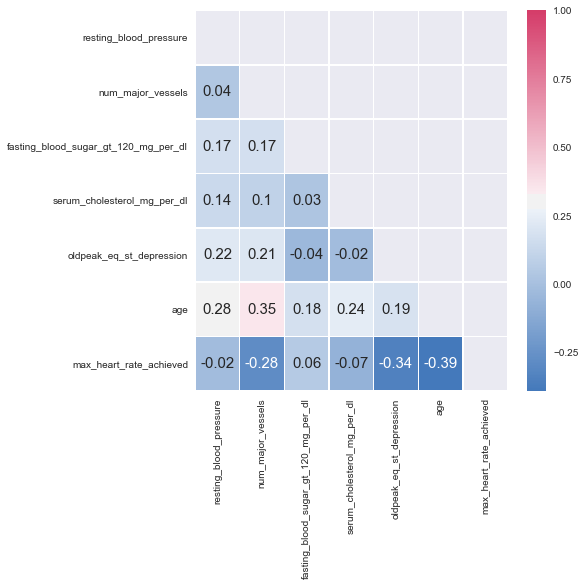

In [51]:
f, ax = plt.subplots(1,1,figsize=(7,7))
plot_corr_heatmap(np.round(data[cont_vars].corr(),2), ax=ax, annotate=True)

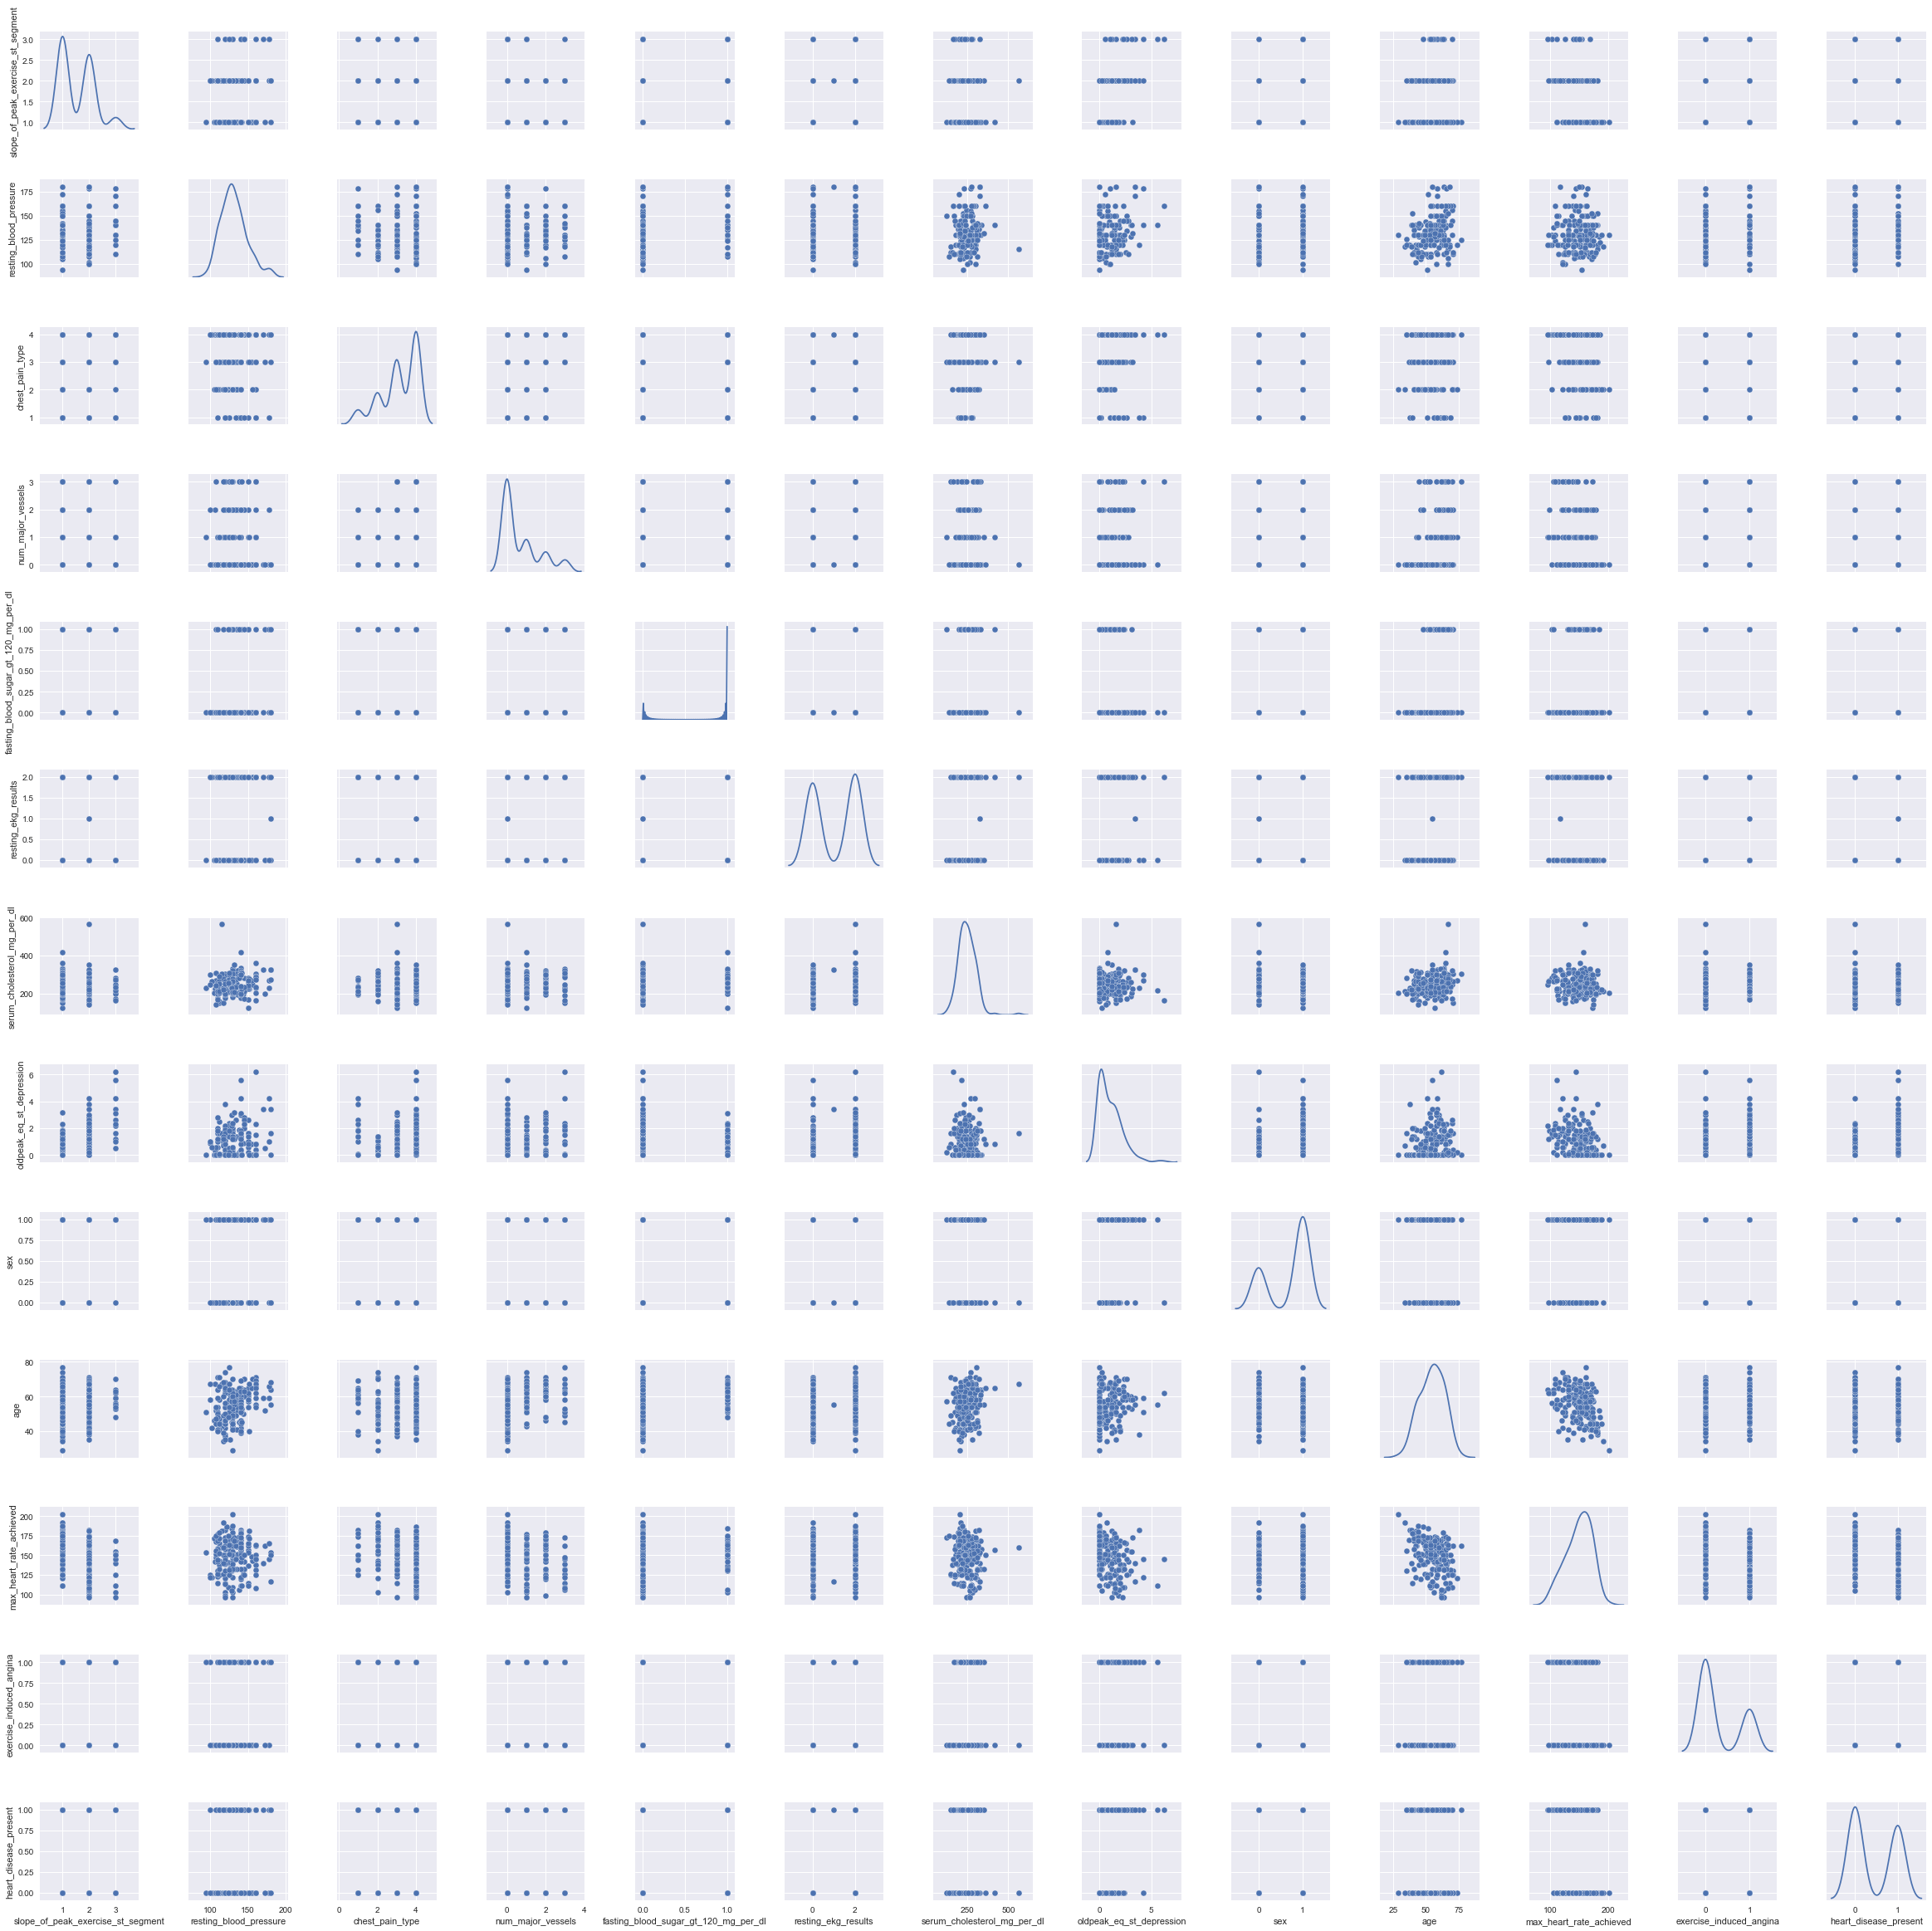

In [52]:
g = sns.pairplot(data=data, diag_kind="kde")

In [53]:
data.to_csv("./data/analysis.csv", index=False)

------------

#  Encoding

In [54]:
data, lenc_dict = labelencode_collist(data, cat_vars)
data, ohe_dict = onehotencode_collist(data, cat_vars)
data.head()

resting_blood_pressure  num_major_vessels  fasting_blood_sugar_gt_120_mg_per_dl  serum_cholesterol_mg_per_dl  oldpeak_eq_st_depression  age  max_heart_rate_achieved  heart_disease_present  slope_of_peak_exercise_st_segment_0  slope_of_peak_exercise_st_segment_1  thal_0  thal_1  chest_pain_type_0  chest_pain_type_1  chest_pain_type_2  resting_ekg_results_0  resting_ekg_results_1  sex_0  exercise_induced_angina_0
0                     128                  0                                     0                          308                       0.0   45                      170                      0                                  0.0                                  0.0     1.0     0.0                1.0                0.0                0.0                    0.0                    1.0    1.0                        0.0
1                     110                  0                                     0                          214                       1.6   54                      158                      0                                  1.0                                  0.0     1.0     0.0                0.0                1.0                0.0                    0.0                    0.0    0.0                        0.0
2                     125                  3                                     0                          304                       0.0   77                      162                      1                                  0.0                                  0.0     1.0     0.0                0.0                0.0                1.0                    0.0                    1.0    1.0                        1.0
3                     152                  0                                     0                          223                       0.0   40                      181                      1                                  0.0                                  0.0     0.0     1.0                0.0                0.0                1.0                    0.0                    0.0    1.0                        0.0
4                     178                  0                                     0                          270                       4.2   59                      145                      0                                  0.0                                  1.0     0.0     1.0                0.0                0.0                0.0                    0.0                    1.0    1.0                        0.0

In [55]:
ycol = ["heart_disease_present"]
xcol = [c for c in data.columns if c.lower() not in ycol]

------

# Scaling

In [56]:
data, scaler_dict = scale_collist(data, xcol)
data = data[xcol + ycol]

In [66]:
data.head()

resting_blood_pressure  num_major_vessels  fasting_blood_sugar_gt_120_mg_per_dl  serum_cholesterol_mg_per_dl  oldpeak_eq_st_depression       age  max_heart_rate_achieved  slope_of_peak_exercise_st_segment_0  slope_of_peak_exercise_st_segment_1    thal_0    thal_1  chest_pain_type_0  chest_pain_type_1  chest_pain_type_2  resting_ekg_results_0  resting_ekg_results_1     sex_0  exercise_induced_angina_0  heart_disease_present
0               -0.195195          -0.718403                             -0.438238                     1.118269                 -0.903207 -1.053964                 0.932485                            -0.845154                            -0.267261  0.914732 -0.835532           2.329929          -0.680746          -0.914732              -0.074744               0.956501  0.672022                  -0.680746                      0
1               -1.256320          -0.718403                             -0.438238                    -0.669778                  0.527616 -0.087134                 0.387084                             1.183216                            -0.267261  0.914732 -0.835532          -0.429198           1.468977          -0.914732              -0.074744              -1.045478 -1.488048                  -0.680746                      0
2               -0.372049           2.385097                             -0.438238                     1.042182                 -0.903207  2.383654                 0.568884                            -0.845154                            -0.267261  0.914732 -0.835532          -0.429198          -0.680746           1.093216              -0.074744               0.956501  0.672022                   1.468977                      1
3                1.219639          -0.718403                             -0.438238                    -0.498582                 -0.903207 -1.591092                 1.432436                            -0.845154                            -0.267261 -1.093216  1.196843          -0.429198          -0.680746           1.093216              -0.074744              -1.045478  0.672022                  -0.680746                      1
4                2.752375          -0.718403                             -0.438238                     0.395442                  2.852703  0.449994                -0.203768                            -0.845154                             3.741657 -1.093216  1.196843          -0.429198          -0.680746          -0.914732              -0.074744               0.956501  0.672022                  -0.680746                      0

------------

#  Train Test Split

In [58]:
from sklearn.model_selection import train_test_split

In [59]:
train_data, test_data = train_test_split(data, test_size=0.3)
x_train = train_data[xcol].values
y_train = train_data[ycol].values
x_test = test_data[xcol].values
y_test = test_data[ycol].values

------------

# Logistic Regresion

In [62]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss

In [65]:
logreg = LogisticRegression().fit(x_train, y_train)
rsq = logreg.score(x_train, y_train)
adjusted_r_squared = 1 - (1 - rsq)*(len(y_train)-1) /\
                            (len(y_train) - x_train.shape[1] - 1)

print("Adjusted Rsq. :", adjusted_r_squared)

y_pred_train = logreg.predict(X=x_train)
ll_train = log_loss(y_train, y_pred_train)

print("Train set Log Loss: {:.2f}".format(ll_train))


Adjusted Rsq. : 0.8701973001038421
Train set Log Loss: 3.84


Run the model on the test set

In [64]:
y_pred_test = logreg.predict(X=x_test)
ll_test = log_loss(y_test, y_pred_test)
print("Test set Log Loss: {:.2f}".format(ll_test))

Test set Log Loss: 5.76


In [67]:
from sklearn.metrics import classification_report

In [70]:
print(classification_report(y_test, y_pred_test, labels=[0, 1]))

precision    recall  f1-score   support

          0       0.96      0.76      0.85        34
          1       0.70      0.95      0.81        20

avg / total       0.87      0.83      0.84        54

